# Lowlevel Simulation

In [1]:
from Go2Py.sim.mujoco import Go2Sim
import numpy as np

In [2]:
robot = Go2Sim(mode='lowlevel')

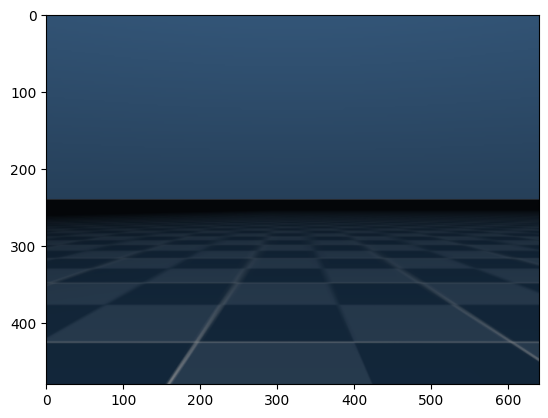

In [3]:
import matplotlib.pyplot as plt
camera_state = robot.getCameraState()
plt.imshow(camera_state['rgb'])

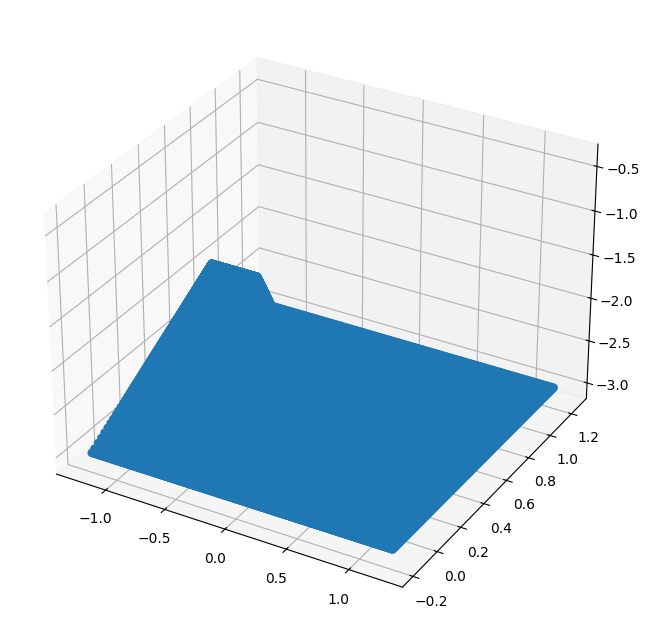

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import proj3d

state = robot.getCameraState(get_pointcloud=True)
pcd = state['pointcloud']

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pcd[:,0], pcd[:,1], pcd[:,2])
plt.show()


In [4]:
robot.getJointStates()

{'q': array([-0.02473053,  1.26249091, -2.82722067,  0.04536265,  1.25053037,
        -2.79265437, -0.30646674,  1.2828985 , -2.82216135,  0.26426387,
         1.29362285, -2.84158745]),
 'dq': array([ 0.11278784, -0.00277931,  0.5229731 , -0.1364931 , -0.00321283,
         0.35066361, -0.11362303,  0.03049349,  0.49368981,  0.13078971,
         0.03355434,  0.59049033]),
 'tau_est': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}

In [9]:
import mujoco
import time
import cv2
camera_dt = 1./60.
robot.standUpReset()
start_time = time.time()
step_counter = 0
while time.time()-start_time < 10:
    state = robot.getJointStates()
    tau = 20*np.eye(12)@(robot.q0 - state['q']).reshape(12,1)
    robot.setCommands(np.zeros(12), np.zeros(12), np.zeros(12), np.zeros(12), tau)
    robot.step()
    if step_counter%(camera_dt//robot.dt)==0:
        camera_state = robot.getCameraState()
        cv2.imshow('rgb', cv2.cvtColor(camera_state['rgb'], cv2.COLOR_BGR2RGB))
        cv2.waitKey(1)
    step_counter+=1
cv2.destroyAllWindows()

# Highlevel Simulation

In [1]:
from Go2Py.sim.mujoco import Go2Sim
import numpy as np

In [2]:
robot = Go2Sim(mode='highlevel')
robot.standUpReset()

p_gains: [20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.]


In [3]:
import mujoco
import time
import cv2
camera_dt = 1./60.
robot.standUpReset()
start_time = time.time()
step_counter = 0
while time.time()-start_time < 10:
    robot.step(0,0,0., step_height=0,kp=[2, 0.5, 0.5], ki=[0.02, 0.01, 0.01])
    if step_counter%(camera_dt//robot.dt)==0:
        camera_state = robot.getCameraState()
        cv2.imshow('rgb', cv2.cvtColor(camera_state['rgb'], cv2.COLOR_BGR2RGB))
        cv2.waitKey(1)
    step_counter+=1
cv2.destroyAllWindows()

In [ ]:
robot.getLaserScan()

In [ ]:
import matplotlib.pyplot as plt
lidar = robot.getLaserScan(max_range=3.)
idx = np.where(lidar['dist']!=-1)[0]
plt.plot(lidar['dist'][idx])